In [5]:
# @title Best Employee Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Load the dataset
# Ensure your dataset is structured with the relevant features
data = pd.read_csv('/content/employee_data.csv')

# Preprocess the data
# Example: Select relevant features for predicting best employee
features = ['performance_score', 'years_at_company', 'teamwork', 'leadership', 'initiative']
X = data[features]
y = data['best_employee']  # Binary target: 1 for best employee, 0 otherwise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model for predicting best employee
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of best employee prediction: {accuracy:.2f}')

# Now, let's predict future company growth
# For forecasting growth, select relevant features
growth_features = ['total_revenue', 'employee_count', 'avg_performance_score', 'market_conditions']
X_growth = data[growth_features]
y_growth = data['future_growth']  # Continuous target variable representing future growth

# Split the dataset for growth prediction
X_growth_train, X_growth_test, y_growth_train, y_growth_test = train_test_split(X_growth, y_growth, test_size=0.2, random_state=42)

# Train the regression model for forecasting growth
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_growth_train, y_growth_train)

# Make growth predictions
y_growth_pred = regressor.predict(X_growth_test)

# Evaluate the growth prediction
mse = mean_squared_error(y_growth_test, y_growth_pred)
print(f'Mean Squared Error of growth prediction: {mse:.2f}')

# Example output
best_employee_index = np.argmax(clf.predict(X))  # Get the index of the predicted best employee
best_employee_info = data.iloc[best_employee_index]
print(f'The predicted best employee is:\n{best_employee_info}')

Accuracy of best employee prediction: 1.00
Mean Squared Error of growth prediction: 0.00
The predicted best employee is:
employee_name              Gopi
performance_score            85
years_at_company              5
teamwork                      9
leadership                    8
initiative                    7
total_revenue            500000
employee_count              100
avg_performance_score        80
market_conditions             7
best_employee                 1
future_growth              0.15
Name: 0, dtype: object


In [6]:
# @title Company Growth Forecast
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Load data
data = pd.read_csv('/content/company_data (2).csv')



# Split historical and present data
historical_data = data[data['year'] != 'Present']
present_data = data[data['year'] == 'Present'].drop(columns=['future_profit_growth', 'required_employee_count', 'product_strategy'])

# Feature selection
features = ['profit', 'revenue', 'employee_count', 'avg_productivity', 'market_conditions', 'product_demand', 'current_product_profitability', 'competitor_performance']

# Preparing data for each target variable
X = historical_data[features]

# Profit growth prediction
y_profit = historical_data['future_profit_growth']
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)
profit_model = RandomForestRegressor(random_state=42)
profit_model.fit(X_train_profit, y_train_profit)

# Predict future profit growth for present data
present_profit_growth = profit_model.predict(present_data[features])
print(f'Predicted future profit growth: {present_profit_growth[0]:.2f}')

# Staffing prediction
y_staff = historical_data['required_employee_count']
staff_model = RandomForestRegressor(random_state=42)
staff_model.fit(X, y_staff)
present_staff_needed = staff_model.predict(present_data[features])
print(f'Predicted required employee count: {present_staff_needed[0]:.0f}')

# Product strategy prediction
y_product = historical_data['product_strategy']
product_model = RandomForestClassifier(random_state=42)
product_model.fit(X, y_product)

# Predict product strategy for present data
present_product_strategy = product_model.predict(present_data[features])
strategy_text = 'Change products' if present_product_strategy[0] == 1 else 'Maintain current products'
print(f'Product strategy decision: {strategy_text}')

# Additional analysis for future growth recommendation
if present_profit_growth[0] > 0.15 and present_staff_needed[0] > historical_data['employee_count'].mean():
    future_growth_recommendation = "The company is on a growth trajectory and should consider product innovation."
else:
    future_growth_recommendation = "The company should focus on optimizing current products and staff efficiency."

print(f'Future growth recommendation: {future_growth_recommendation}')

Predicted future profit growth: 0.19
Predicted required employee count: 192
Product strategy decision: Change products
Future growth recommendation: The company is on a growth trajectory and should consider product innovation.


Predicted future profit growth: 0.19
Predicted required employee count: 192
Product strategy decision: Change products
Future growth recommendation: The company is on a growth trajectory and should consider product innovation.


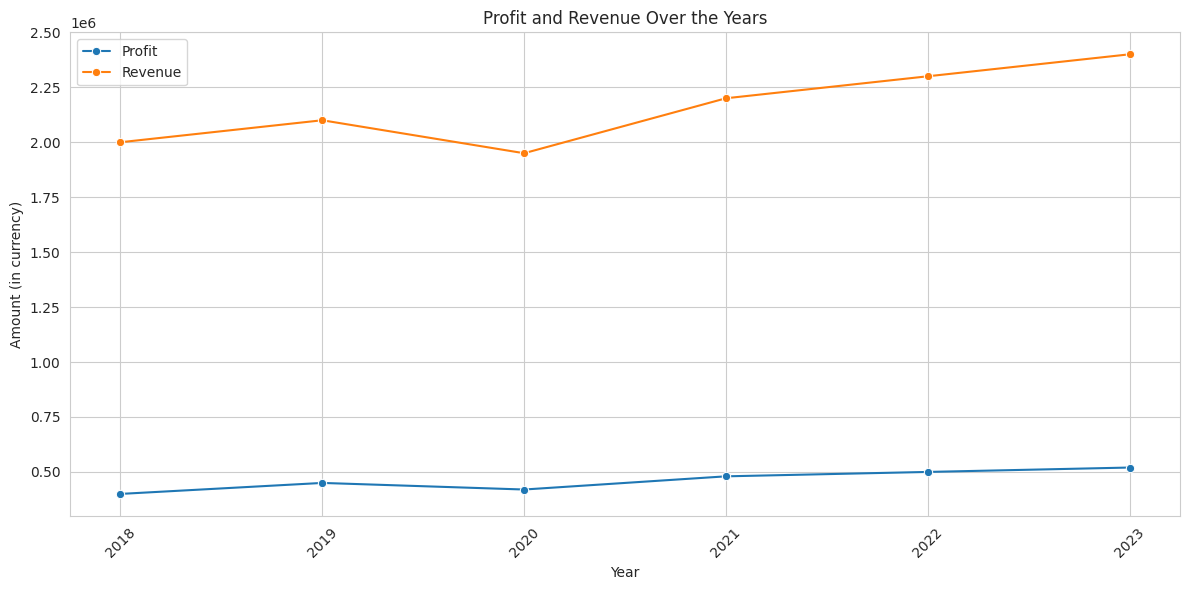

<ipython-input-7-25c0b7a8f8f2>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=historical_data, x='year', y='employee_count', palette='viridis')


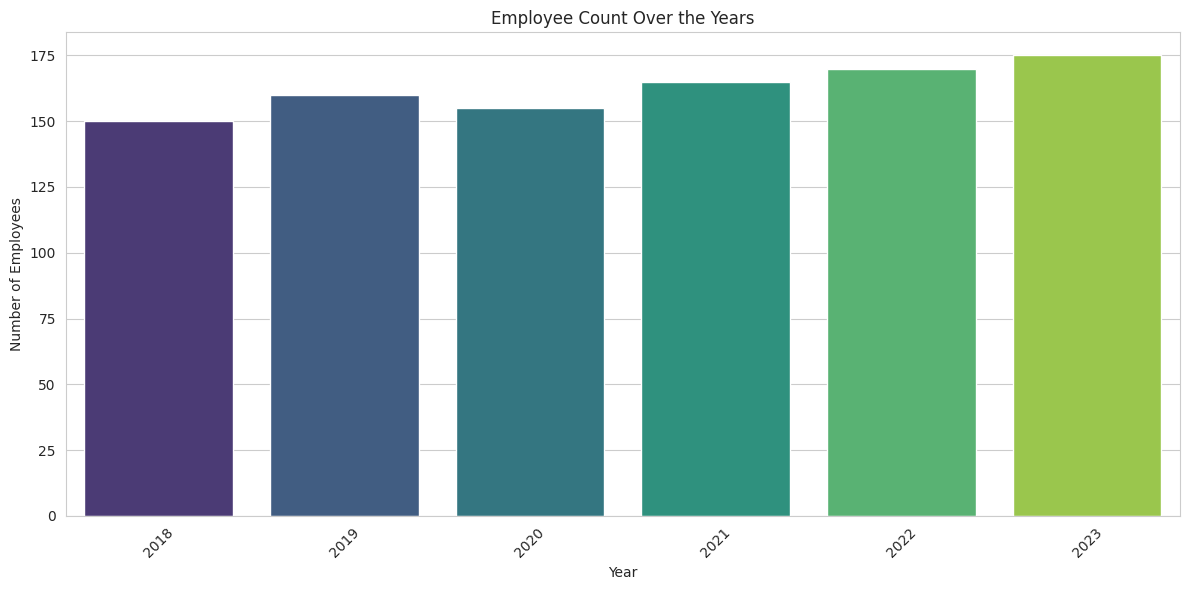

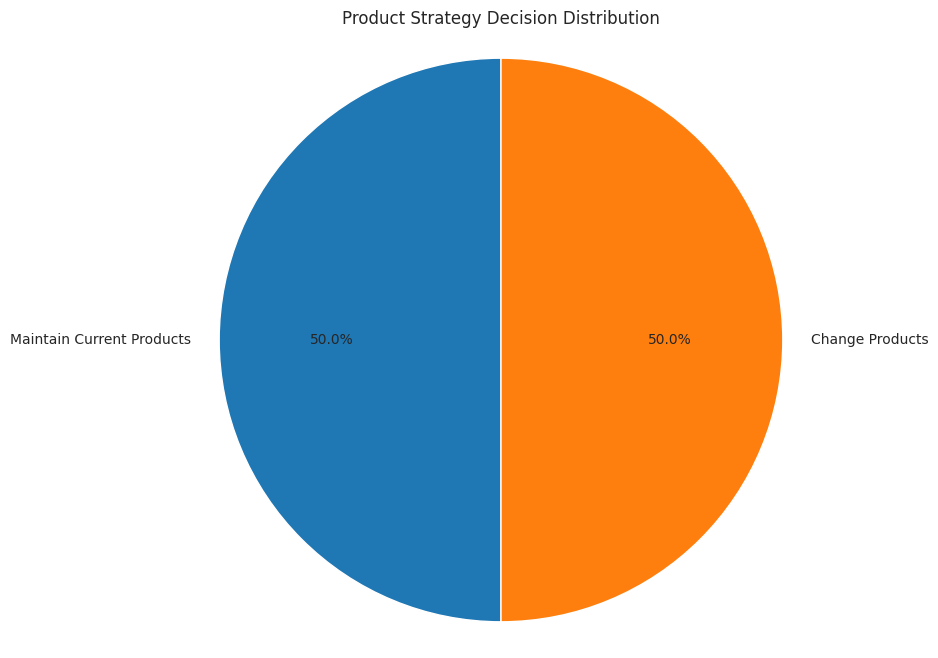

In [ ]:
# @title Business Forecasting System
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Load data
data = pd.read_csv('/content/company_data.csv')

# Split historical and present data
historical_data = data[data['year'] != 'Present']
present_data = data[data['year'] == 'Present'].drop(columns=['future_profit_growth', 'required_employee_count', 'product_strategy'])

# Feature selection
features = ['profit', 'revenue', 'employee_count', 'avg_productivity', 'market_conditions', 'product_demand', 'current_product_profitability', 'competitor_performance']

# Preparing data for each target variable
X = historical_data[features]

# Profit growth prediction
y_profit = historical_data['future_profit_growth']
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)
profit_model = RandomForestRegressor(random_state=42)
profit_model.fit(X_train_profit, y_train_profit)

# Predict future profit growth for present data
present_profit_growth = profit_model.predict(present_data[features])
print(f'Predicted future profit growth: {present_profit_growth[0]:.2f}')

# Staffing prediction
y_staff = historical_data['required_employee_count']
staff_model = RandomForestRegressor(random_state=42)
staff_model.fit(X, y_staff)
present_staff_needed = staff_model.predict(present_data[features])
print(f'Predicted required employee count: {present_staff_needed[0]:.0f}')

# Product strategy prediction
y_product = historical_data['product_strategy']
product_model = RandomForestClassifier(random_state=42)
product_model.fit(X, y_product)

# Predict product strategy for present data
present_product_strategy = product_model.predict(present_data[features])
strategy_text = 'Change products' if present_product_strategy[0] == 1 else 'Maintain current products'
print(f'Product strategy decision: {strategy_text}')

# Additional analysis for future growth recommendation
if present_profit_growth[0] > 0.15 and present_staff_needed[0] > historical_data['employee_count'].mean():
    future_growth_recommendation = "The company is on a growth trajectory and should consider product innovation."
else:
    future_growth_recommendation = "The company should focus on optimizing current products and staff efficiency."

print(f'Future growth recommendation: {future_growth_recommendation}')

# Visualization

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Profit and Revenue Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical_data, x='year', y='profit', label='Profit', marker='o')
sns.lineplot(data=historical_data, x='year', y='revenue', label='Revenue', marker='o')
plt.title('Profit and Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in currency)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Employee Count Over the Years
plt.figure(figsize=(12, 6))
sns.barplot(data=historical_data, x='year', y='employee_count', palette='viridis')
plt.title('Employee Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Product Strategy Decision
strategy_counts = historical_data['product_strategy'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(strategy_counts, labels=['Maintain Current Products', 'Change Products'], autopct='%1.1f%%', startangle=90)
plt.title('Product Strategy Decision Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is a circle.
plt.show()